# Assignment 3B
**Convolutional Neural Network (CNN)**
<br> Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Preprocessing

In [3]:
# load the dataset
train_df = pd.read_csv('fashion_mnist_train.csv')
test_df = pd.read_csv('fashion_mnist_test.csv')

In [8]:
# separate labels and features

x_train = train_df.iloc[:, 1:].values  # all rows, columns 1 to n
y_train = train_df.iloc[:, 0].values  # all rows, column 0

x_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [7]:
# normalize pixel values to [0, 1]
x_train = X_train / 255.0
x_test = X_test / 255.0

In [9]:
# reshape to 28x28x1 for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
# one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### Build & Train CNN

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 fashion classes
])

# compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [13]:
# train the model
history = model.fit(
    x_train, y_train_cat,
    epochs = 10,
    batch_size = 64,
    validation_split = 0.1
)

Epoch 1/10
844/844 [==============================] - 13s 14ms/step - loss: 0.8949 - accuracy: 0.7500 - val_loss: 0.4005 - val_accuracy: 0.8487
Epoch 2/10
844/844 [==============================] - 12s 14ms/step - loss: 0.4573 - accuracy: 0.8326 - val_loss: 0.3688 - val_accuracy: 0.8575
Epoch 3/10
844/844 [==============================] - 12s 14ms/step - loss: 0.3902 - accuracy: 0.8555 - val_loss: 0.3270 - val_accuracy: 0.8802
Epoch 4/10
844/844 [==============================] - 12s 14ms/step - loss: 0.3583 - accuracy: 0.8684 - val_loss: 0.3151 - val_accuracy: 0.8847
Epoch 5/10
844/844 [==============================] - 12s 14ms/step - loss: 0.3384 - accuracy: 0.8746 - val_loss: 0.3016 - val_accuracy: 0.8860
Epoch 6/10
844/844 [==============================] - 12s 14ms/step - loss: 0.3169 - accuracy: 0.8839 - val_loss: 0.3010 - val_accuracy: 0.8882
Epoch 7/10
844/844 [==============================] - 12s 15ms/step - loss: 0.3042 - accuracy: 0.8863 - val_loss: 0.2925 - val_accuracy:

### Evaluation & Prediction

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2749 - accuracy: 0.9009
Test Accuracy:  0.9009000062942505


In [16]:
# get predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [17]:
# classification report
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.81      0.84      1000
           3       0.92      0.92      0.92      1000
           4       0.81      0.88      0.84      1000
           5       0.98      0.97      0.97      1000
           6       0.69      0.74      0.72      1000
           7       0.96      0.94      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



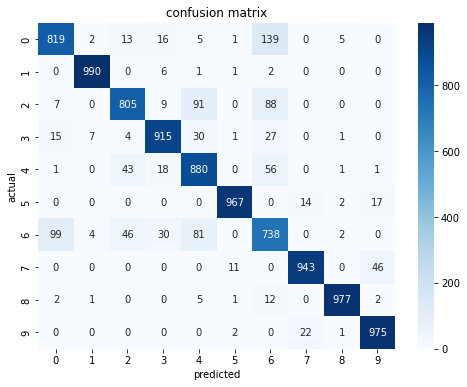

In [18]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

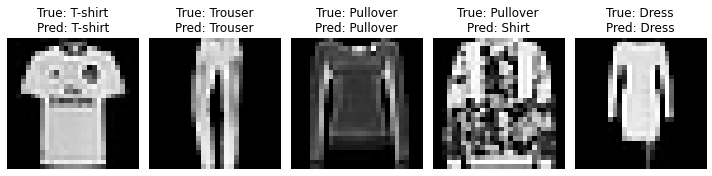

In [19]:
# sample predictions

labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {labels[y_test[i]]}\nPred: {labels[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()